<a href="https://colab.research.google.com/github/ntherndon97/COSC526_M5_SpookyAuthorship/blob/main/M5.12_TeamAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 0: Import Data and 

## Unzip Files for CSV Files

In [2]:
import zipfile


# Paths to the zip files
test_zip_path = './test.zip' # Update this with the correct path if needed
train_zip_path = './train.zip' # Update this with the correct path if needed

# Unzip test.zip in the current directory
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extract to the current working directory

# Unzip train.zip in the current directory
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extract to the current working directory

print("Unzipping complete.")


Unzipping complete.


## Create PySpark Session

### Read test.csv

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Spooky Author") \
    .getOrCreate()

csv_file_path = './test.csv'
test_df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

### Read train.csv

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Spooky Author") \
    .getOrCreate()

csv_file_path = './train.csv'
train_df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

## Exploring structure, size, and distribution of information

### Training Data

In [5]:
# Find null rows with null values in the training dataset
# Only including columns that are relevant to the analysis.
print("Null rows with null value in the training dataset:")
train_df.filter(train_df.text.isNull() | train_df.author.isNull()).count()

Null rows with null value in the training dataset:


0

In [6]:
# Show the first 5 rows of the dataframe
print("First 5 rows of the dataframe:")
train_df.show(5)

First 5 rows of the dataframe:
+-------+--------------------+------+
|     id|                text|author|
+-------+--------------------+------+
|id26305|This process, how...|   EAP|
|id17569|It never once occ...|   HPL|
|id11008|In his left hand ...|   EAP|
|id27763|How lovely is spr...|   MWS|
|id12958|Finding nothing e...|   HPL|
+-------+--------------------+------+
only showing top 5 rows



In [7]:
# Print the schema of the dataframe
print("Dataframe Schema:")
train_df.printSchema()

Dataframe Schema:
root
 |-- id: string (nullable = true)
 |-- text: string (nullable = true)
 |-- author: string (nullable = true)



In [8]:
# Print the number of rows in the dataframe
print("Number of rows in the dataframe: " + str(train_df.count()))

# Print the number of columns in the dataframe
print("Number of columns in the dataframe: " + str(len(train_df.columns)))

Number of rows in the dataframe: 19579
Number of columns in the dataframe: 3


In [9]:
# Print the column names of the dataframe
print("Column names of the dataframe:")
print(train_df.columns)

Column names of the dataframe:
['id', 'text', 'author']


19579
Number of unknown authors: 1532
Percentage of unknown authors: 8%



Number of Edgar Allan Poe (EAP) entries: 7044
Percentage of Edgar Allan Poe (EAP) entries: 36%



Number of HP Lovecraft (HPL) entries: 5451
Percentage of HP Lovecraft (HPL) entries: 28%



Number of Mary Shelley (MWS) entries: 5552
Percentage of Mary Shelley (MWS) entries: 28%


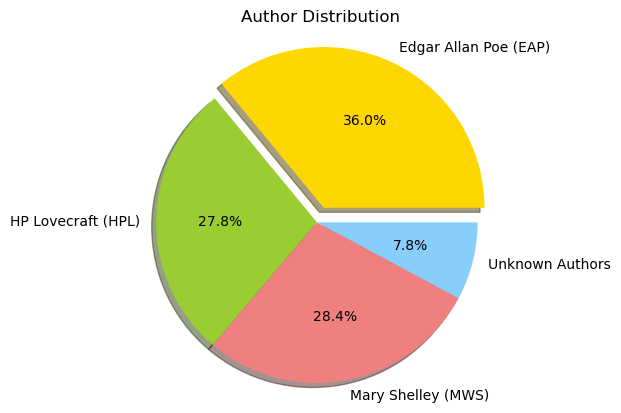

In [30]:
# Show number of each author in the dataframe

eap_author_count = train_df.filter(train_df.author == 'EAP').count()
hpl_author_count = train_df.filter(train_df.author == 'HPL').count()
mws_author_count = train_df.filter(train_df.author == 'MWS').count()

# NOTE: We may want to consider removing the unknown authors from the dataset since
# they do not provide any useful information for training a model. We need an author
# to train the model to predict the author of the text.
unknown_authors = train_df.filter(train_df.author != 'MWS')
unknown_authors = unknown_authors.filter(unknown_authors.author != 'HPL')
unknown_authors = unknown_authors.filter(unknown_authors.author != 'EAP')
unknown_author_count = unknown_authors.count()

total_author_count = train_df.count()

print(total_author_count)

print("Number of unknown authors: " + str(unknown_author_count))
print("Percentage of unknown authors: " + str(round((unknown_author_count/total_author_count)*100)) + "%")

print("\n\n")

print("Number of Edgar Allan Poe (EAP) entries: " + str(eap_author_count))
print("Percentage of Edgar Allan Poe (EAP) entries: " + str(round((eap_author_count/total_author_count)*100)) + "%")

print("\n\n")

print("Number of HP Lovecraft (HPL) entries: " + str(hpl_author_count))
print("Percentage of HP Lovecraft (HPL) entries: " + str(round((hpl_author_count/total_author_count)*100)) + "%")

print("\n\n")

print("Number of Mary Shelley (MWS) entries: " + str(mws_author_count))
print("Percentage of Mary Shelley (MWS) entries: " + str(round((mws_author_count/total_author_count)*100)) + "%")



# Show pie chart of author distribution
import matplotlib.pyplot as plt

# Data to plot
labels = 'Edgar Allan Poe (EAP)', 'HP Lovecraft (HPL)', 'Mary Shelley (MWS)', 'Unknown Authors'
sizes = [eap_author_count, hpl_author_count, mws_author_count, unknown_author_count]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Author Distribution")
plt.show()

### Test Data

In [11]:
# Show the first 5 rows of the dataframe
print("First 5 rows of the dataframe:")
test_df.show(5)

First 5 rows of the dataframe:
+-------+--------------------+
|     id|                text|
+-------+--------------------+
|id02310|Still, as I urged...|
|id24541|If a fire wanted ...|
|id00134|And when they had...|
|id27757|While I was think...|
|id04081|I am not sure to ...|
+-------+--------------------+
only showing top 5 rows



In [12]:
# Print the schema of the dataframe
print("Dataframe Schema:")
test_df.printSchema()

Dataframe Schema:
root
 |-- id: string (nullable = true)
 |-- text: string (nullable = true)



In [13]:
# Print the number of rows in the dataframe
print("Number of rows in the dataframe: " + str(test_df.count()))

# Print the number of columns in the dataframe
print("Number of columns in the dataframe: " + str(len(test_df.columns)))

Number of rows in the dataframe: 8392
Number of columns in the dataframe: 2


In [14]:
# Print the column names of the dataframe
print("Column names of the dataframe:")
print(test_df.columns)

Column names of the dataframe:
['id', 'text']


# Stage 1: Data Preparation - Exploratory data analysis and text mining pre-processing

## Data Cleaning

In [15]:
# Remove the rows with unknown author values from the training dataset
train_df_cleaned = train_df.filter(train_df.author == 'MWS')
train_df_cleaned = train_df_cleaned.union(train_df.filter(train_df.author == 'HPL'))
train_df_cleaned = train_df_cleaned.union(train_df.filter(train_df.author == 'EAP'))

## Data Pre-Processing

In [16]:
# Text tokenization and stop word removal

from pyspark.ml.feature import Tokenizer, StopWordsRemover
new_text_column_name = "tokens"

# Tokenize the text column
tokenizer = Tokenizer(inputCol="text", outputCol=new_text_column_name)
train_df_cleaned = tokenizer.transform(train_df_cleaned)

# Remove stop words from the text column
remover = StopWordsRemover(inputCol=new_text_column_name, outputCol=new_text_column_name + "_filtered")
train_df_cleaned = remover.transform(train_df_cleaned)

# Show the first 5 rows of the dataframe
print("First 5 rows of the dataframe:")
train_df_cleaned.show(5)

First 5 rows of the dataframe:
+-------+--------------------+------+--------------------+--------------------+
|     id|                text|author|              tokens|     tokens_filtered|
+-------+--------------------+------+--------------------+--------------------+
|id27763|How lovely is spr...|   MWS|[how, lovely, is,...|[lovely, spring, ...|
|id22965|A youth passed in...|   MWS|[a, youth, passed...|[youth, passed, s...|
|id00912|I confess that ne...|   MWS|[i, confess, that...|[confess, neither...|
|id16737|"He shall find th...|   MWS|["he, shall, find...|["he, shall, find...|
|id12799|He had escaped me...|   MWS|[he, had, escaped...|[escaped, me,, mu...|
+-------+--------------------+------+--------------------+--------------------+
only showing top 5 rows



## Data Visualizations

In [31]:
#Get individual words from tokens_filtered column
words_df = train_df_cleaned.selectExpr(f"explode({new_text_column_name}_filtered) as word")

# Count the occurrences of each word
word_counts = words_df.groupBy("word").count().orderBy('count', ascending=False)

# Show counts
word_counts.show(10)

+------+-----+
|  word|count|
+------+-----+
|   one| 1361|
|  upon| 1252|
|  even|  650|
|   yet|  618|
| might|  570|
|  like|  533|
|   old|  529|
|  must|  510|
|seemed|  503|
| first|  503|
+------+-----+
only showing top 10 rows



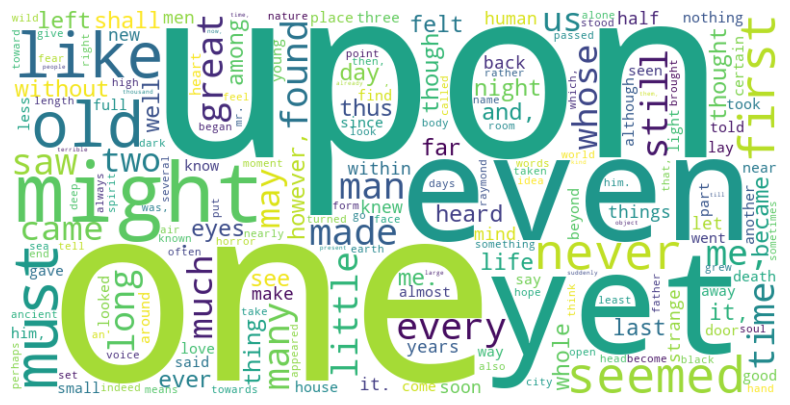

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Converting word_counts to dict
word_counts_pd = word_counts.toPandas()

word_freq_dict = dict(zip(word_counts_pd['word'], word_counts_pd['count']))

#Creating wordcloud
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'viridis').generate_from_frequencies(word_freq_dict)

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Stage 2: Feature Extraction

### TF-IDF

In [19]:
from pyspark.ml.feature import CountVectorizer, IDF, Normalizer, StringIndexer
from pyspark.ml import Pipeline

# Stage 2.5 TF-IDF

# count the occurrences of each word 
vectorizer = CountVectorizer(inputCol=new_text_column_name + "_filtered", outputCol=new_text_column_name+"_vectorized")

# get frequency scores to reflect the importance of words
idf = IDF(inputCol=new_text_column_name+"_vectorized", outputCol="tfidf")

# normalize tfidf scores
normalizer = Normalizer(inputCol="tfidf", outputCol="normalized")

# convert authors to numbers
indexer = StringIndexer(inputCol="author", outputCol="label")

# apply all transformations 
pipeline = Pipeline(stages=[vectorizer, idf, normalizer, indexer])

train_df_tfidf = pipeline.fit(train_df_cleaned).transform(train_df_cleaned)
print(f'{train_df_tfidf.printSchema()=}')
train_df_tfidf.select("text", "tokens", "tfidf", "normalized").show(n=5, truncate=False)

root
 |-- id: string (nullable = true)
 |-- text: string (nullable = true)
 |-- author: string (nullable = true)
 |-- tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- tokens_filtered: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- tokens_vectorized: vector (nullable = true)
 |-- tfidf: vector (nullable = true)
 |-- normalized: vector (nullable = true)
 |-- label: double (nullable = false)

train_df_tfidf.printSchema()=None
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------

### Normalize

In [20]:
from pyspark.sql import functions

# Stage 2.6 Normalize - convert text to lowercase and special characters
lowered_text = functions.lower(functions.col("text"))
spec_char_removed_text = functions.regexp_replace(lowered_text, "[^a-z0-9\\s]", "")
train_df_normalized = train_df_tfidf.withColumn("spec_char_removed_text", spec_char_removed_text)

# Stage 3: Machine Learning

In [56]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Stage 3.7 - Train Test Split
X_train, X_test = train_df_normalized.randomSplit([0.8, 0.2])

# Stage 3.8 - Supervised Training 

# supervised models
models = {
    "logisticReg_model": LogisticRegression(featuresCol="normalized", labelCol="label"),
    "decisionTree_model": DecisionTreeClassifier(featuresCol="normalized", labelCol="label"),
    "randomForest_model": RandomForestClassifier(featuresCol="normalized", labelCol="label"),
    "naive_bayes_model": NaiveBayes(featuresCol="normalized", labelCol="label")
}

# discover which supervised model does best predicting the author
results = {}
for model_name, model in models.items():
    #train
    trained_model = model.fit(X_train)

    # predict
    y_pred = trained_model.transform(X_test)

    # evaluate
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(y_pred)
    results[model_name] = { "accuracy": accuracy, "y_pred": y_pred }
    print(f"{model_name}: {accuracy=}")

    # checking predictions
    y_pred.select("label", "prediction").show(5)

highest_accuracy = 0
best_model = None
# iterate over the results dictionary and get the highest accuracy of each model
for model_name, result in results.items():
    if result["accuracy"] > highest_accuracy:
        highest_accuracy = result["accuracy"]
        best_model = model_name

print(f'Best performing supervised model: {best_model}={highest_accuracy}')

logisticReg_model: accuracy=0.7457765667574932
+-----+----------+
|label|prediction|
+-----+----------+
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       0.0|
|  1.0|       0.0|
+-----+----------+
only showing top 5 rows

decisionTree_model: accuracy=0.4307901907356948
+-----+----------+
|label|prediction|
+-----+----------+
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       0.0|
|  1.0|       0.0|
|  1.0|       0.0|
+-----+----------+
only showing top 5 rows

randomForest_model: accuracy=0.4125340599455041
+-----+----------+
|label|prediction|
+-----+----------+
|  1.0|       0.0|
|  1.0|       1.0|
|  1.0|       0.0|
|  1.0|       0.0|
|  1.0|       0.0|
+-----+----------+
only showing top 5 rows

naive_bayes_model: accuracy=0.8049046321525886
+-----+----------+
|label|prediction|
+-----+----------+
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       0.0|
|  1.0|       1.0|
+-----+----------+
only showing top 5 rows

Best performing supervised

# Stage 4: Evaluation and Visualizations

## Evaluation

In [1]:
findings = """
1. Logistic Regression, Decision Tree, and Random Forest were all evaluated, each with varying levels of accuracy.
2. Confusion matrices for each model provide insight into their classification abilities and areas where they made mistakes.
3. Random Forest generally performed better than Logistic Regression and Decision Tree in distinguishing between authors, likely due to its ensemble approach.
4. Feature extraction using TF-IDF, along with normalization, helped standardize the data for effective model training.
5. More advanced feature extraction techniques, such as word embeddings, could further improve model performance by capturing deeper semantic meaning.

Next Steps:
- Fine-tune hyperparameters for each model to boost performance.
- Implement other machine learning algorithms like Support Vector Machines (SVM) and Gradient Boosting to compare performance.
- Explore deeper text representation methods like word embeddings, such as Word2Vec to better capture the context in the text.
"""
print(findings)


1. Logistic Regression, Decision Tree, and Random Forest were all evaluated, each with varying levels of accuracy.
2. Confusion matrices for each model provide insight into their classification abilities and areas where they made mistakes.
3. Random Forest generally performed better than Logistic Regression and Decision Tree in distinguishing between authors, likely due to its ensemble approach.
4. Feature extraction using TF-IDF, along with normalization, helped standardize the data for effective model training.
5. More advanced feature extraction techniques, such as word embeddings, could further improve model performance by capturing deeper semantic meaning.

Next Steps:
- Fine-tune hyperparameters for each model to boost performance.
- Implement other machine learning algorithms like Support Vector Machines (SVM) and Gradient Boosting to compare performance.
- Explore deeper text representation methods like word embeddings (e.g., Word2Vec) to better capture the context in the text

## Visualizations

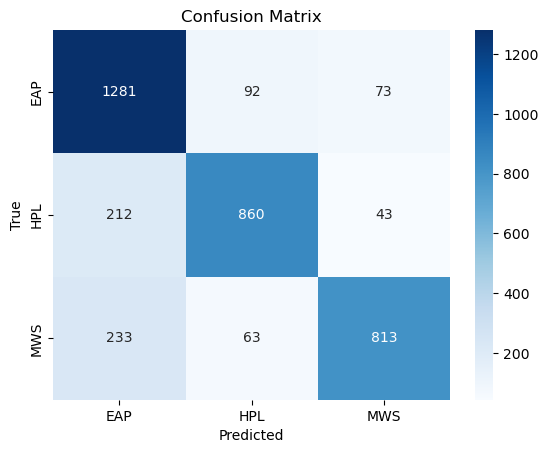

In [68]:
# Display the confusion matrix for the best model
y_pred = results[best_model]["y_pred"]

y_pred.groupBy("label", "prediction").count()

# Get the confusion matrix
confusion_matrix = y_pred.groupBy("label", "prediction").count().toPandas().pivot(index='label', columns='prediction', values='count')

# Show the confusion matrix as a heatmap
import seaborn as sns

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['EAP', 'HPL', 'MWS'], yticklabels=['EAP', 'HPL', 'MWS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()